                                                Red Wine and White Wine Classification

Install and import packages

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import LSTM, Dense


In [98]:
# Load the datasets
red = pd.read_csv("C:\\Users\\Huawei\\Desktop\\Python\\labwork2\\winequality-red.csv")
white = pd.read_csv("C:\\Users\\Huawei\\Desktop\\Python\\labwork2\\winequality-white.csv")

                                                                Data Preparation

In [99]:
# Check the column names in wine_data1
print(red.columns)

# Check the column names in wine_data2
print(white.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


Description of Qualities

1.Fixed acidity: are non-volatile acids that do not evaporate easily

2.Volatile acidity: acetic acid content which leading to an unpleasant vinegar taste

3.Citric Acid: acts as a preservative to increase acidity (small quantities add freshness and flavor to wines)

4.Residual sugar: is the amount of sugar remaining after fermentation stops. (Wines > 45g/ltrs are sweet)

5.Chlorides: the amount of salt

6.Free Sulfur Dioxide: it prevents microbial growth and the oxidation of wine

7.Total Sulfur Dioxide: is the amount of S02

8.Density: sweeter wines have a higher density

9.pH: the level of acidity

10.Sulphates: a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant

11.Alcohol: the amount of alcohol in wine

12.Quality: overall sensory characteristics and subjective evaluation


In [100]:
#descriptive statistics across all the variables
red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar   
count    1599.000000       1599.000000  1599.000000     1599.000000  \
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density   
count  1599.000000          1599.000000           1599.000000  1599.000000  \
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [101]:
white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar   
count    4898.000000       4898.000000  4898.000000     4898.000000  \
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density   
count  4898.000000          4898.000000           4898.000000  4898.000000  \
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [102]:
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0            7.4              0.70         0.00             1.9      0.076  \
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                 11.0                  34.0   0.9978  3.51       0.56  \
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [103]:
print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [104]:
print(white.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [105]:
#checking for missing values
print( red.isnull().sum())
print( white.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [106]:
# Add 'type' coloum to the data, 1 is reffered to red and 0 is reffered to white
red['type'] = 0
white['type'] = 1

# Merge datasets
wine_data = pd.concat([red, white], ignore_index=True)

                                                                Data Preprocessing

Explore the boxplot of the attributes, to check the outliers

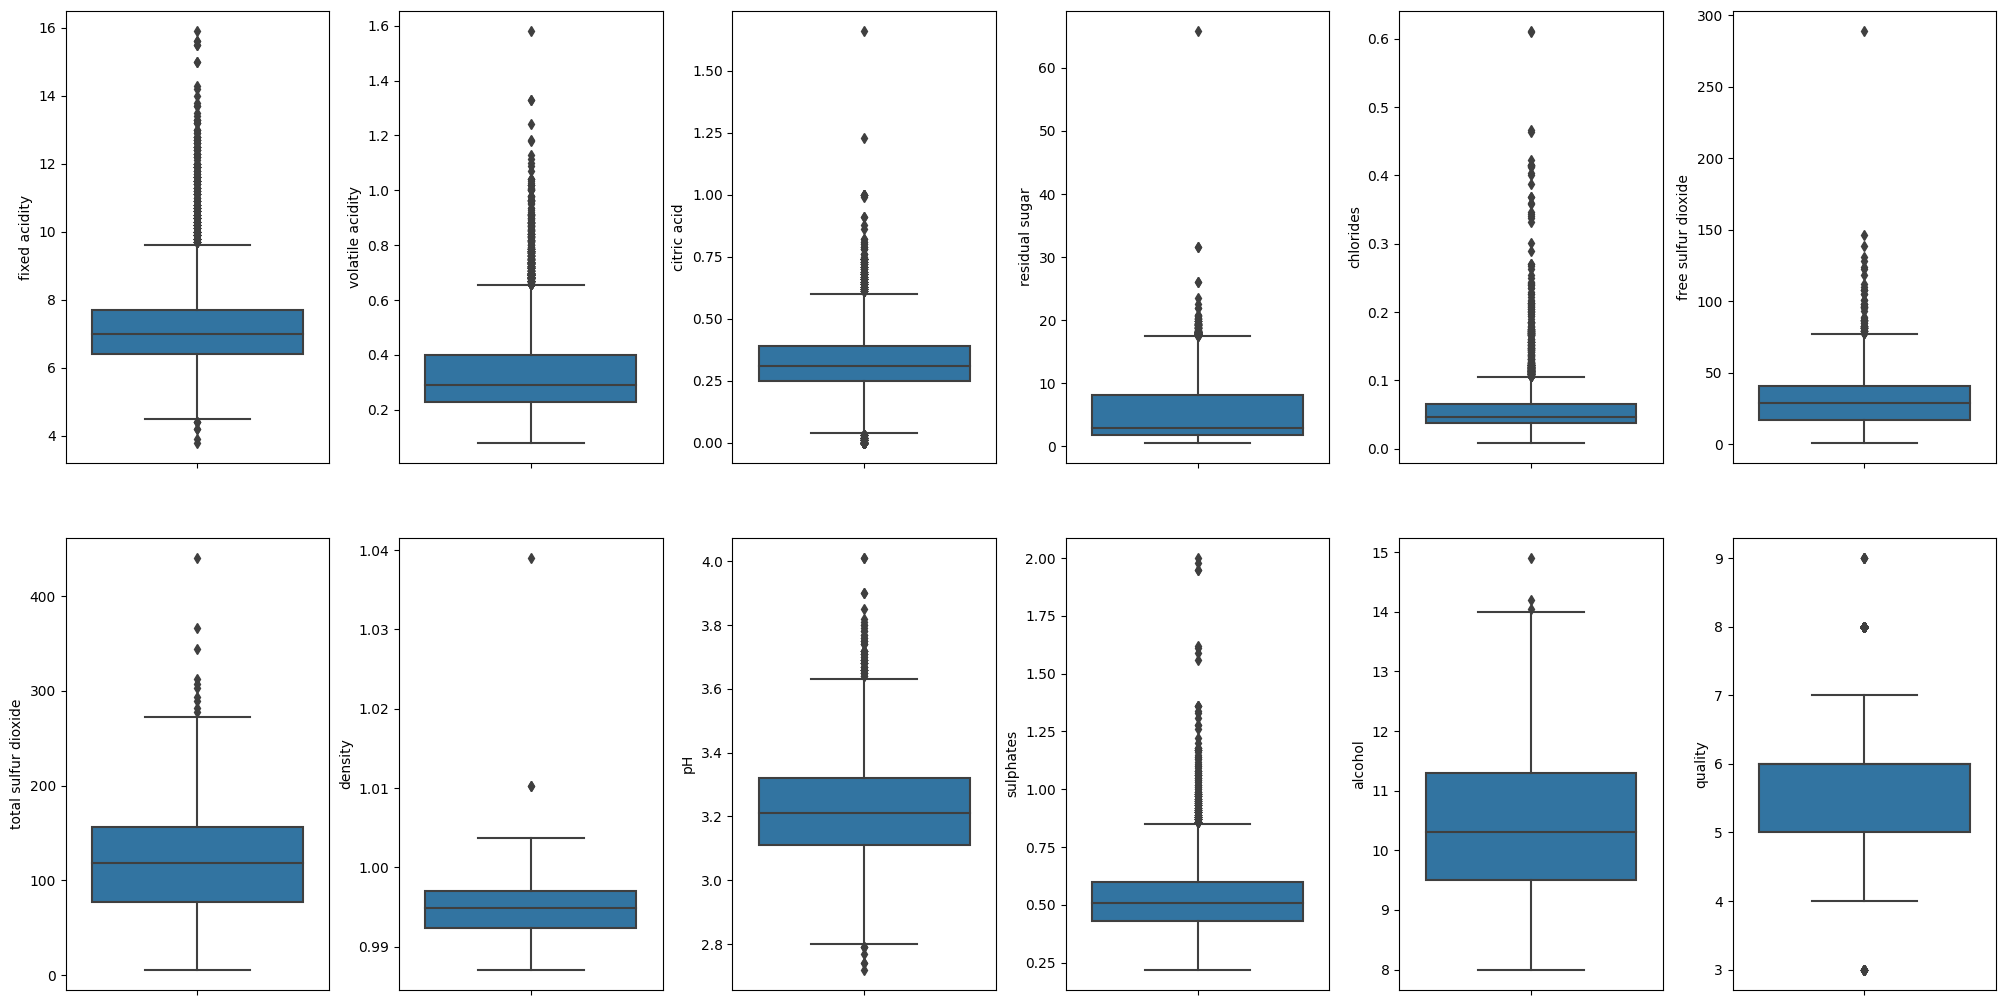

In [107]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in wine_data.items():
    if col != 'type':
        sns.boxplot(y=col, data=wine_data, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

We observe outliers from a few attributes. 

Eliminating these outliers will improve the accuracy of the model.

Since it won't affect the outcome of the project, we will ignore this outlier.

Explore the distribution plot of all numerical attributes

C:\Users\Huawei\AppData\Local\Temp\ipykernel_20980\3252608790.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value, ax=ax[index])
C:\Users\Huawei\AppData\Local\Temp\ipykernel_20980\3252608790.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value, ax=ax[index])
C:\Users\Huawei\AppData\Lo

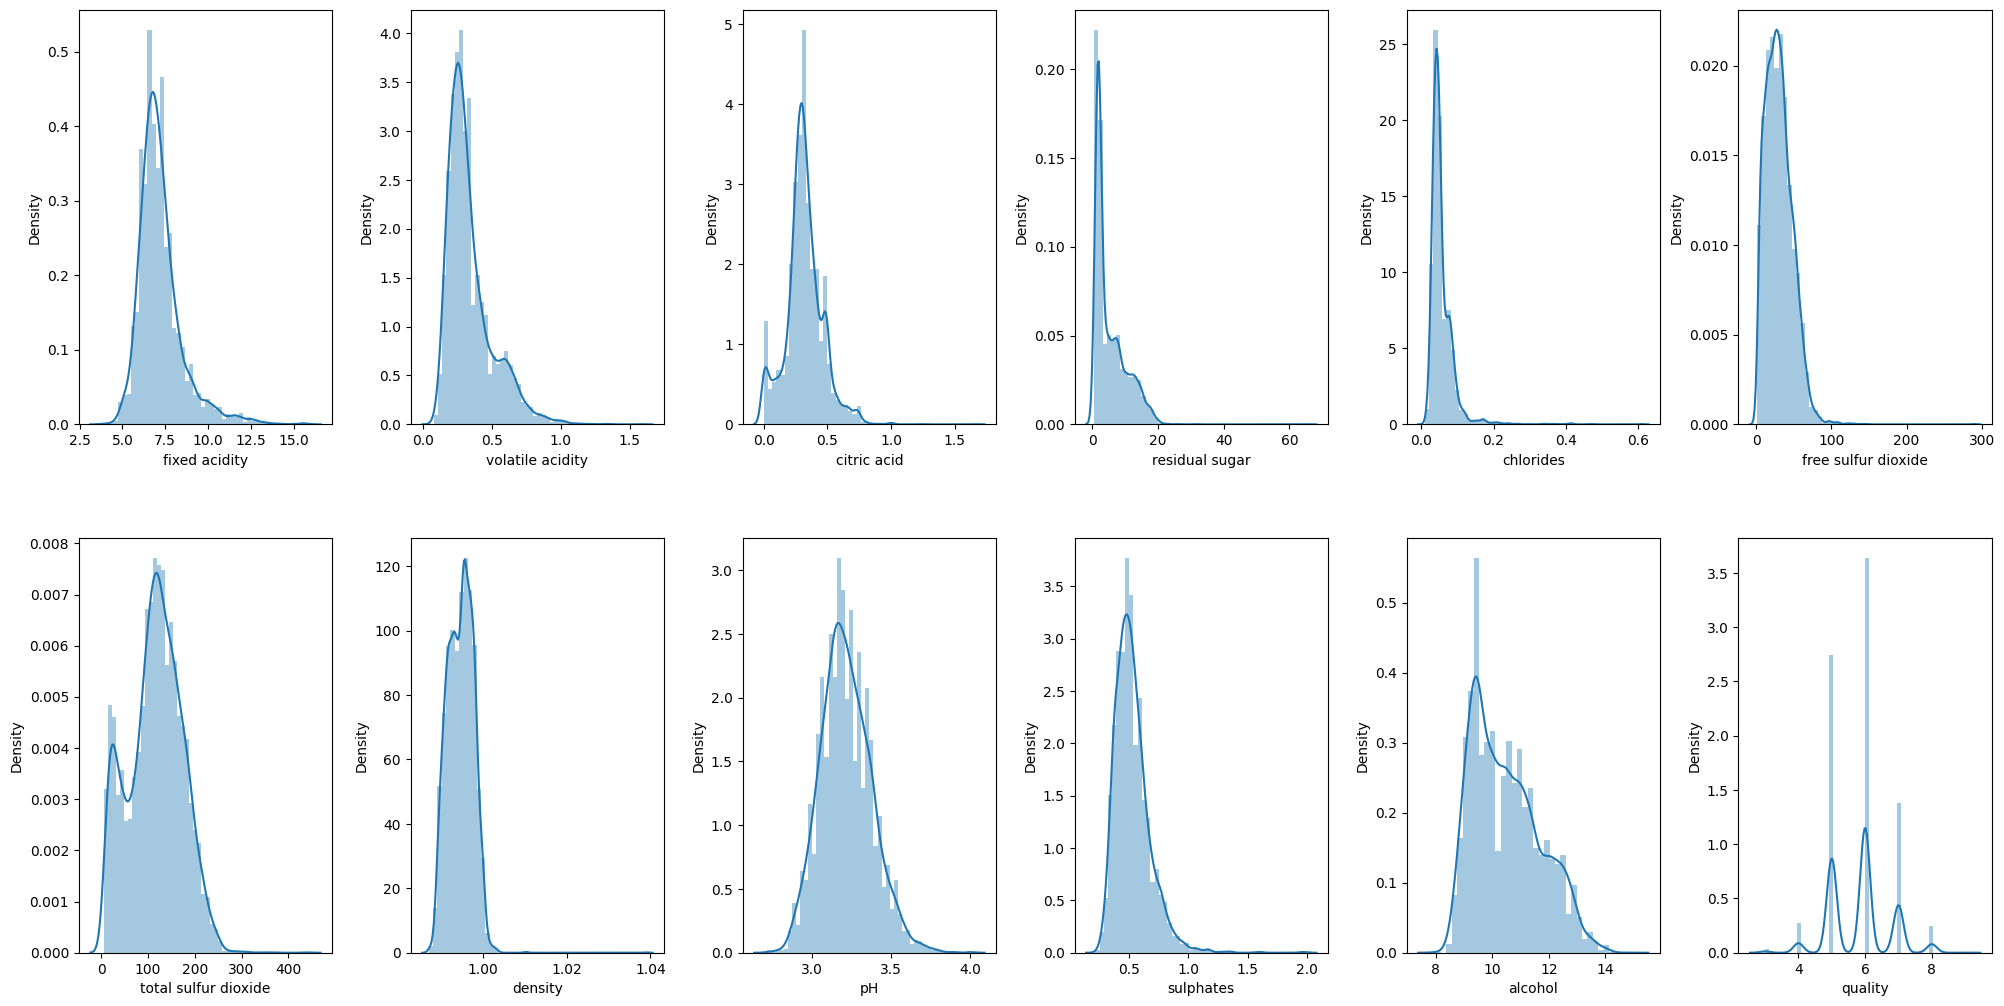

In [108]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in wine_data.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Upon observing the graphs, we notice that some attributes exhibit a wider range. To enhance the quality of these attributes, we can eliminate outliers.
Specifically, the 'Free sulfur dioxide' column displays a slight right-skewness. To address this, we can apply a log transformation to normalize the data and mitigate the skewness.

C:\Users\Huawei\AppData\Local\Temp\ipykernel_20980\3606006770.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine_data['free sulfur dioxide'])


<Axes: xlabel='free sulfur dioxide', ylabel='Density'>

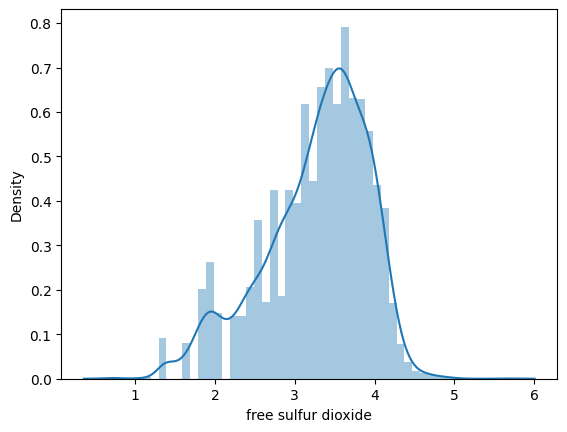

In [109]:
# log transformation
wine_data['free sulfur dioxide'] = np.log(1 + wine_data['free sulfur dioxide'])
sns.distplot(wine_data['free sulfur dioxide'])

From the above graph shown, we can observe a normal distribution in a form of a bell curve

In [110]:
#Verify the unique values in the 'wine_type' column:
print(wine_data['type'].unique())

[0 1]


 Explore the datasets count in different wines

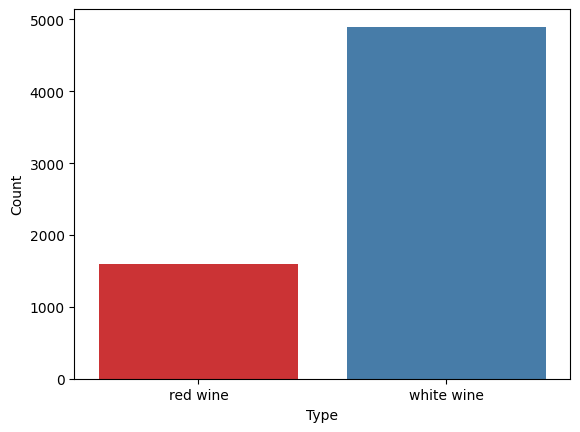

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming wine_data is a DataFrame with 'type' column
wine_type_labels = ['red wine', 'white wine']

sns.countplot(data=wine_data , x='type', palette='Set1')
plt.xticks([0, 1], wine_type_labels)
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

Most datasets belong to the white wines category.

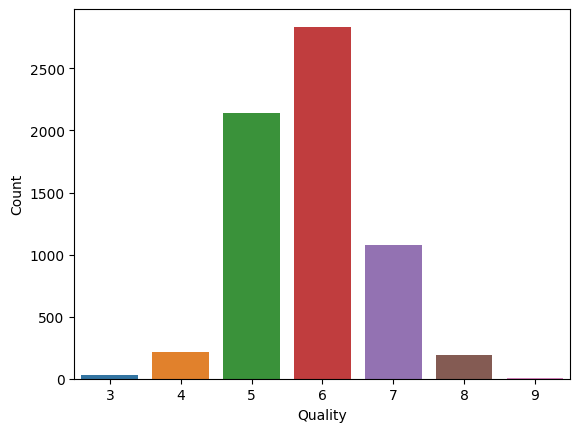

In [112]:
sns.countplot(data=wine_data, x='quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


The quality rating in this dataset is limited to a range of 3 to 9, rather than the full range of 0 to 10.
The counts of wines in the middle quality classes are higher compared to the extreme classes. As a result, the model may exhibit a bias towards these three classes, as they have more representation in the dataset.

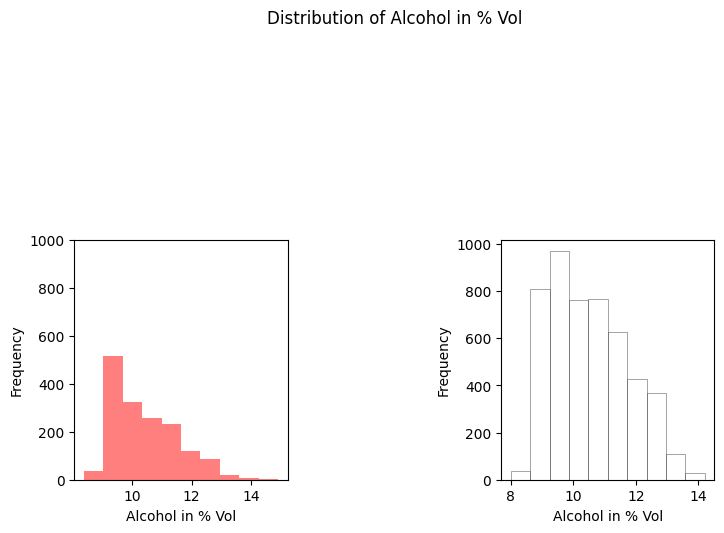

In [137]:
fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

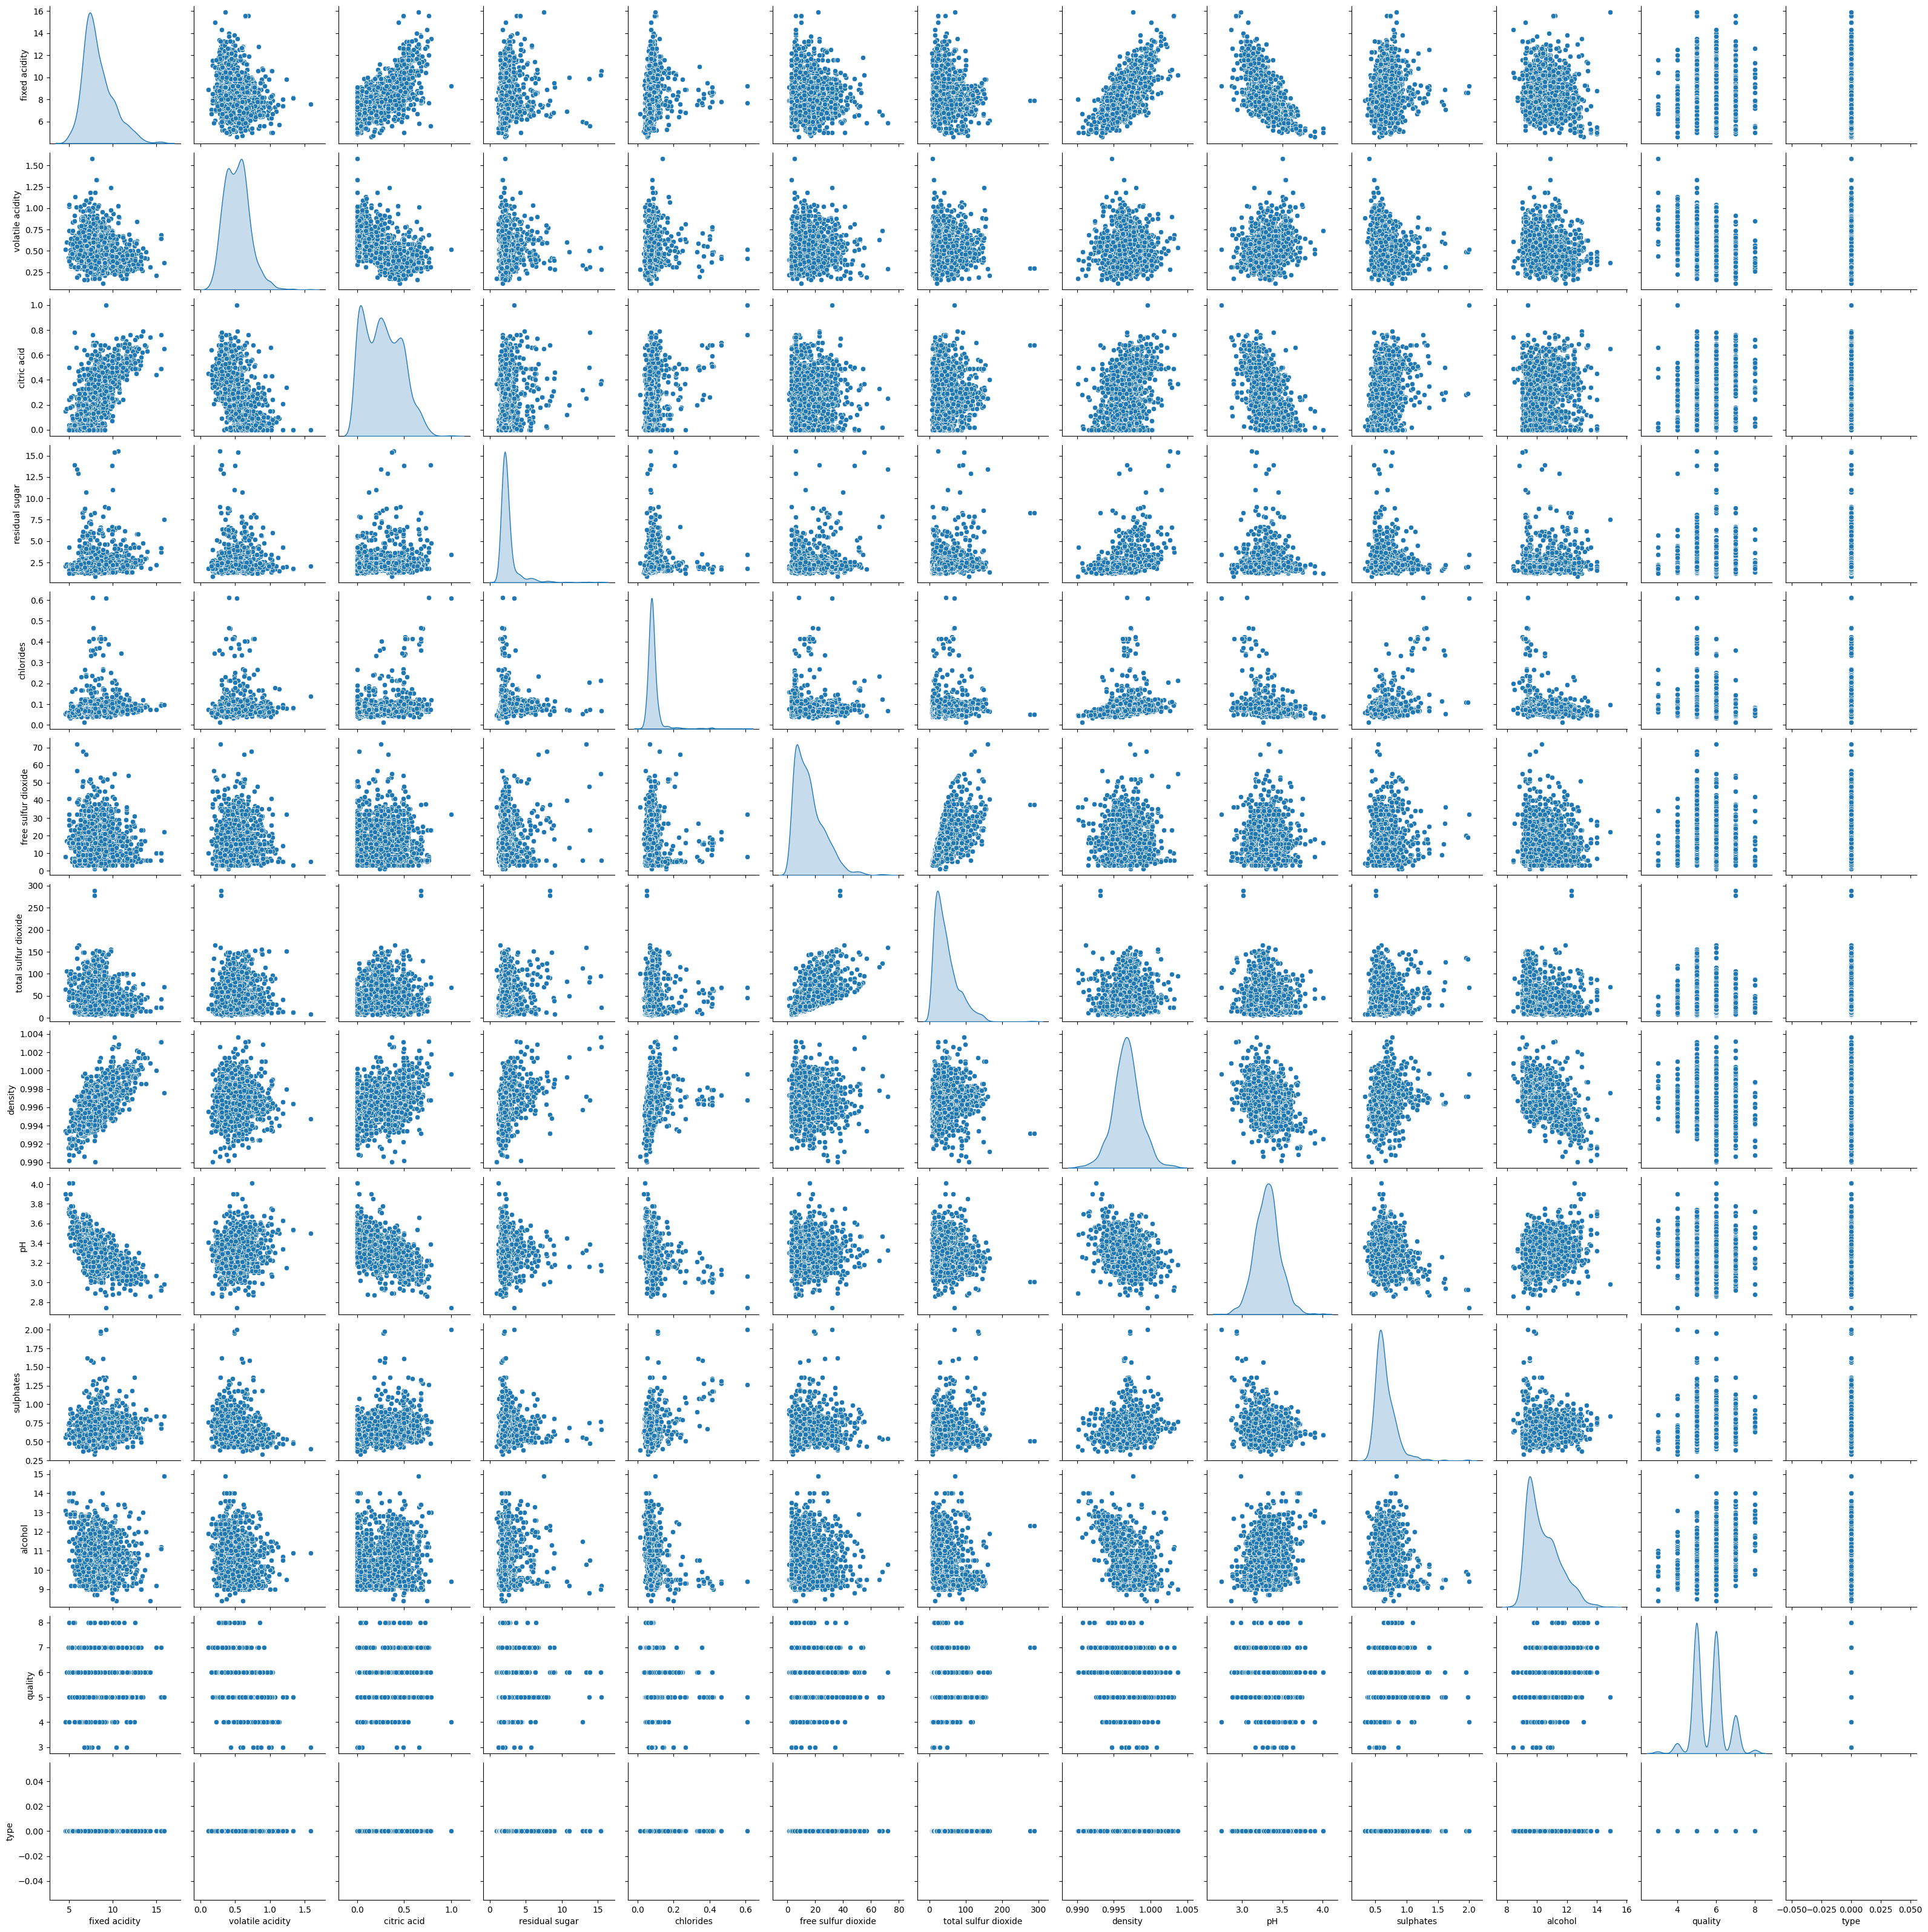

In [138]:
sns.pairplot(data=red, diag_kind = 'kde')

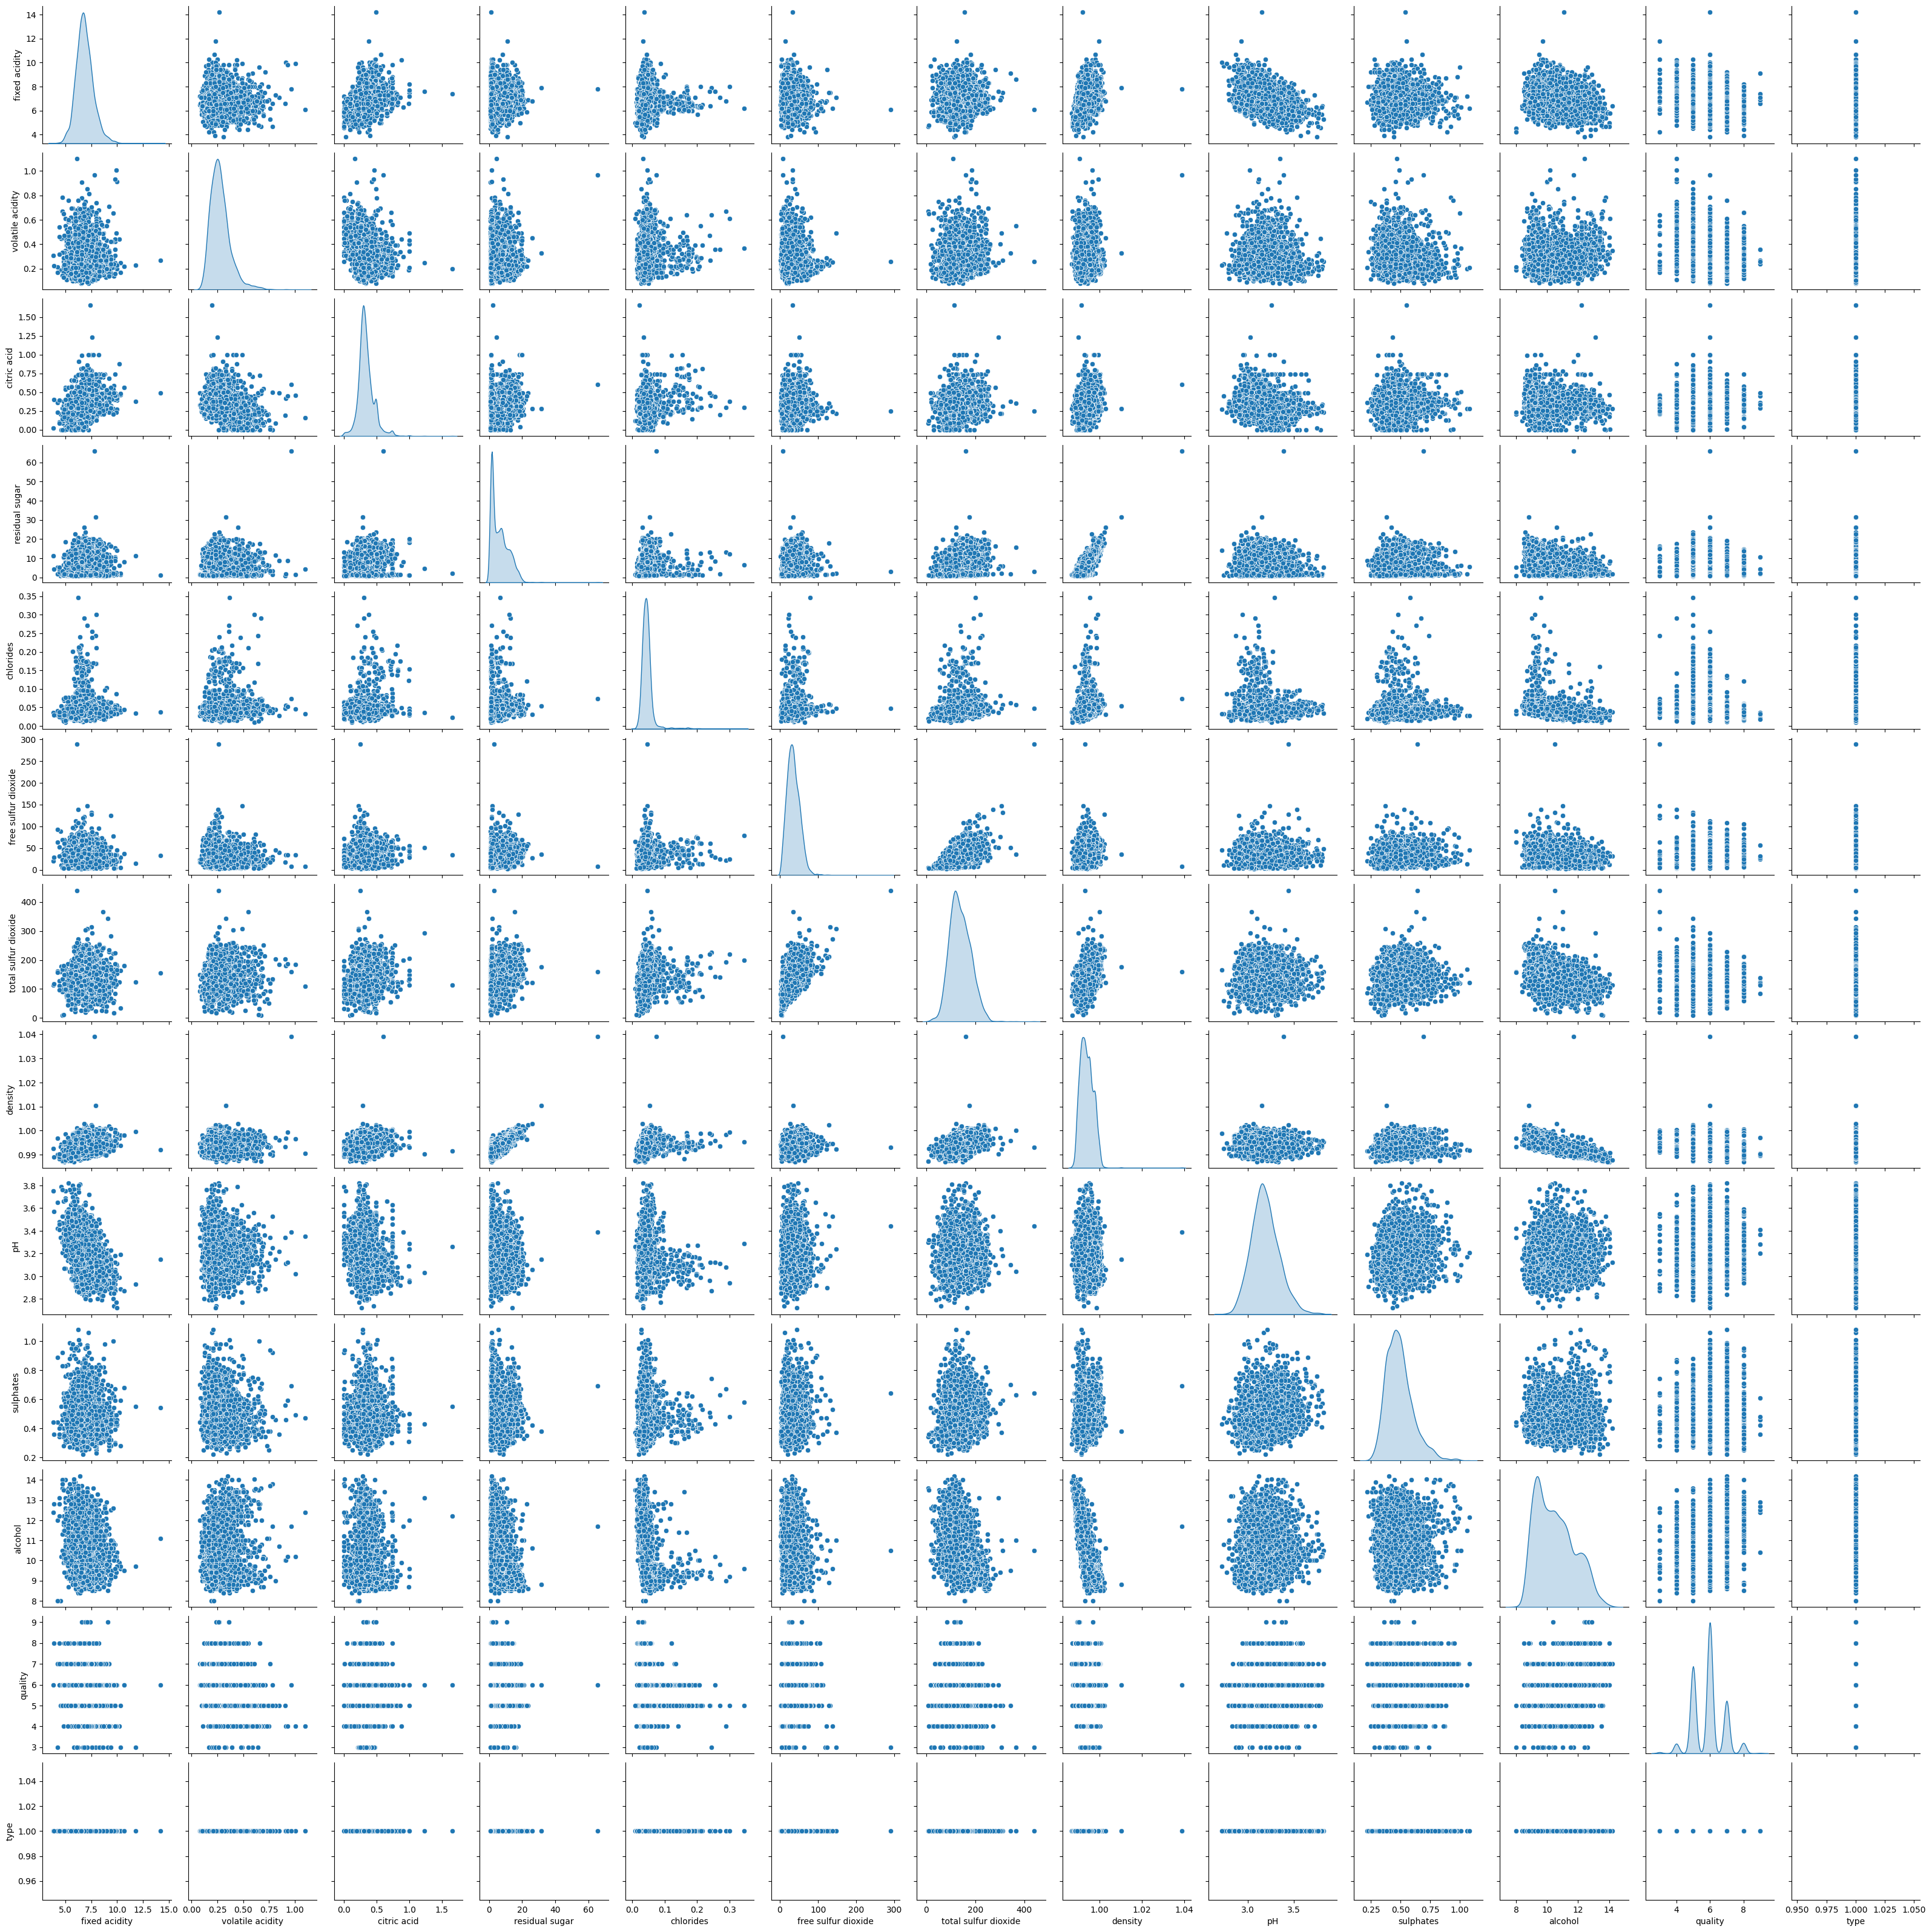

In [139]:
sns.pairplot(data=white, diag_kind = 'kde')

Setting out a correlation Matrix

<Axes: >

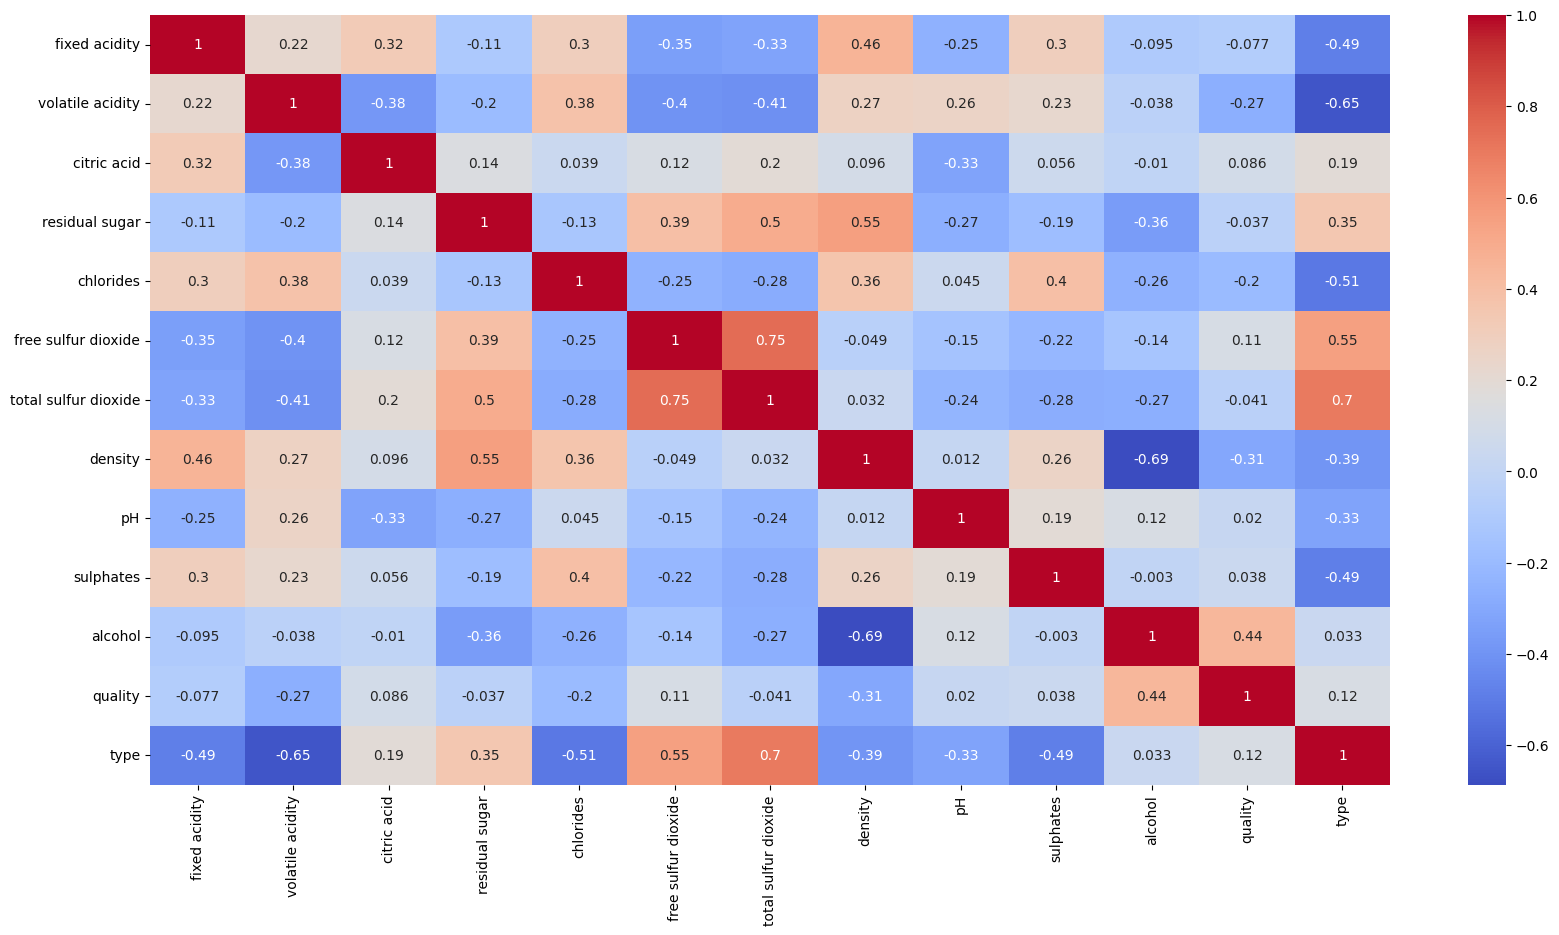

In [140]:
corr = wine_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

Prepare train and test dataset

In [192]:
# Specify the data
X = wine_data.iloc[:, 0:11]

# Target label
y = wine_data['type']

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [190]:
print( "X-train Shape:",X_train.shape)
print( "X-test Shape:" ,X_test.shape)
print( "y-train Shape:", y_train.shape)
print( "y-test Shape:" ,y_test.shape)

X-train Shape: (2915, 11, 1)
X-test Shape: (2145, 11, 1)
y-train Shape: (2915,)
y-test Shape: (2145,)


Scaling the data to take account of variations in mean and standard deviations

In [193]:
from sklearn.preprocessing import StandardScaler

# Define the scaler for normalization
scaler = StandardScaler().fit(X_train)

# Normalize the training dataset
X_train = scaler.transform(X_train)

# Normalize the validation dataset
X_val = scaler.transform(X_val)

# Normalize the test dataset
X_test = scaler.transform(X_test)


                                                                    Model Delevopment

                                                        Simple Feedforward Neural Network Architecture

                                                                Multilayer Perceptron (MLP)

In [194]:
# Initialize the model
model_mlp = Sequential()

model_mlp.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model_mlp.add(Dense(64, activation='relu'))
model_mlp.add(Dense(1, activation='sigmoid'))

# Print the model summary
model_mlp.summary()

Model: "sequential_355"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1045 (Dense)          (None, 64)                768       
                                                                 
 dense_1046 (Dense)          (None, 64)                4160      
                                                                 
 dense_1047 (Dense)          (None, 1)                 65        
                                                                 
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


In [195]:
# Compile the model
model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_mlp= model_mlp.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model_mlp.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/20
92/92 [==============================] - 2s 7ms/step - loss: 0.2059 - accuracy: 0.9496 - val_loss: 0.0472 - val_accuracy: 0.9903
Epoch 2/20
92/92 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9918 - val_loss: 0.0264 - val_accuracy: 0.9944
Epoch 3/20
92/92 [==============================] - 0s 4ms/step - loss: 0.0314 - accuracy: 0.9935 - val_loss: 0.0203 - val_accuracy: 0.9958
Epoch 4/20
92/92 [==============================] - 0s 4ms/step - loss: 0.0269 - accuracy: 0.9955 - val_loss: 0.0175 - val_accuracy: 0.9965
Epoch 5/20
92/92 [==============================] - 0s 4ms/step - loss: 0.0241 - accuracy: 0.9955 - val_loss: 0.0168 - val_accuracy: 0.9979
Epoch 6/20
92/92 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9962 - val_loss: 0.0149 - val_accuracy: 0.9993
Epoch 7/20
92/92 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9966 - val_loss: 0.0140 - val_accuracy: 0.9993
Epoch 8/20
92/92 [==

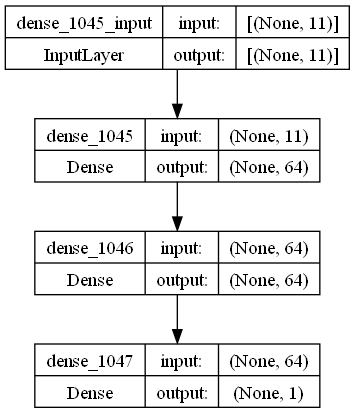

In [196]:
from keras.utils import plot_model

plot_model(model_mlp, to_file='model_mlp.png', show_shapes=True)


Reshaping the input data into a 3D shape allows the LSTM model to process the sequential nature of the data. It helps the model capture patterns and dependencies across different time steps, which is crucial for tasks like time series forecasting, natural language processing, and sequence classification.

In [173]:
# Reshape the input data
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = np.array(X_val).reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

In [174]:
# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.summary()

Model: "sequential_351"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                16896     
                                                                 
 dense_1039 (Dense)          (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [175]:
# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_lstm = model_lstm.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model_lstm.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
92/92 [==============================] - 5s 18ms/step - loss: 0.4948 - accuracy: 0.7839 - val_loss: 0.3567 - val_accuracy: 0.8518
Epoch 2/10
92/92 [==============================] - 1s 11ms/step - loss: 0.2623 - accuracy: 0.8889 - val_loss: 0.2502 - val_accuracy: 0.9012
Epoch 3/10
92/92 [==============================] - 2s 17ms/step - loss: 0.1939 - accuracy: 0.9276 - val_loss: 0.1789 - val_accuracy: 0.9339
Epoch 4/10
92/92 [==============================] - 1s 16ms/step - loss: 0.1658 - accuracy: 0.9372 - val_loss: 0.1763 - val_accuracy: 0.9339
Epoch 5/10
92/92 [==============================] - 1s 10ms/step - loss: 0.1470 - accuracy: 0.9448 - val_loss: 0.1423 - val_accuracy: 0.9471
Epoch 6/10
92/92 [==============================] - 1s 10ms/step - loss: 0.1432 - accuracy: 0.9461 - val_loss: 0.1229 - val_accuracy: 0.9520
Epoch 7/10
92/92 [==============================] - 1s 10ms/step - loss: 0.1242 - accuracy: 0.9523 - val_loss: 0.1129 - val_accuracy: 0.9569
Epoch 8/10
92

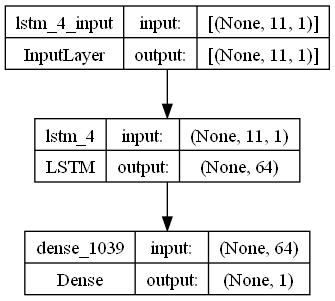

In [176]:
from keras.utils import plot_model

plot_model(model_lstm, to_file='model_lstm.png', show_shapes=True)

In [177]:
# Architecture 3: Convolutional Neural Network (CNN)
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model_cnn = Sequential()
model_cnn.add(Conv1D(64, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(1, activation='sigmoid'))

model_cnn.summary()

Model: "sequential_352"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 7, 64)             384       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 3, 64)            0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 192)               0         
                                                                 
 dense_1040 (Dense)          (None, 1)                 193       
                                                                 
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [178]:
# Compile the model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_cnn = model_cnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model_cnn.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
92/92 [==============================] - 2s 7ms/step - loss: 0.3844 - accuracy: 0.9290 - val_loss: 0.1973 - val_accuracy: 0.9756
Epoch 2/10
92/92 [==============================] - 0s 4ms/step - loss: 0.1323 - accuracy: 0.9849 - val_loss: 0.0886 - val_accuracy: 0.9868
Epoch 3/10
92/92 [==============================] - 0s 4ms/step - loss: 0.0739 - accuracy: 0.9863 - val_loss: 0.0581 - val_accuracy: 0.9910
Epoch 4/10
92/92 [==============================] - 0s 4ms/step - loss: 0.0560 - accuracy: 0.9883 - val_loss: 0.0458 - val_accuracy: 0.9916
Epoch 5/10
92/92 [==============================] - 0s 4ms/step - loss: 0.0479 - accuracy: 0.9897 - val_loss: 0.0385 - val_accuracy: 0.9923
Epoch 6/10
92/92 [==============================] - 0s 4ms/step - loss: 0.0433 - accuracy: 0.9904 - val_loss: 0.0357 - val_accuracy: 0.9930
Epoch 7/10
92/92 [==============================] - 0s 4ms/step - loss: 0.0403 - accuracy: 0.9914 - val_loss: 0.0314 - val_accuracy: 0.9930
Epoch 8/10
92/92 [==

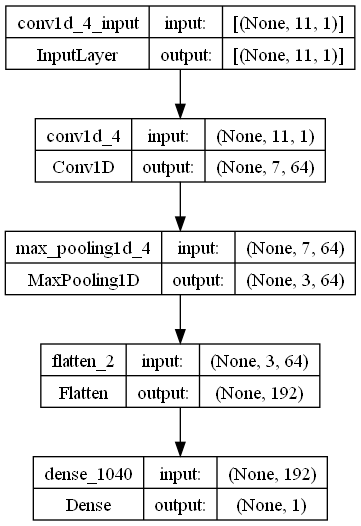

In [179]:
from keras.utils import plot_model

plot_model(model_cnn, to_file='model_cnn.png', show_shapes=True)

In [180]:
# Architecture 4: Recurrent Neural Network (RNN)
model_rnn = Sequential()
model_rnn.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_rnn.add(Dense(64, activation='relu'))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.summary()

Model: "sequential_353"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1041 (Dense)          (None, 64)                768       
                                                                 
 dense_1042 (Dense)          (None, 64)                4160      
                                                                 
 dense_1043 (Dense)          (None, 1)                 65        
                                                                 
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


In [181]:
# Compile the model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model_rnn.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
92/92 [==============================] - 2s 6ms/step - loss: 0.2686 - accuracy: 0.9266 - val_loss: 0.0511 - val_accuracy: 0.9916
Epoch 2/10
92/92 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 0.9925 - val_loss: 0.0257 - val_accuracy: 0.9944
Epoch 3/10
92/92 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9945 - val_loss: 0.0227 - val_accuracy: 0.9944
Epoch 4/10
92/92 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9938 - val_loss: 0.0200 - val_accuracy: 0.9958
Epoch 5/10
92/92 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9955 - val_loss: 0.0175 - val_accuracy: 0.9958
Epoch 6/10
92/92 [==============================] - 0s 3ms/step - loss: 0.0226 - accuracy: 0.9955 - val_loss: 0.0152 - val_accuracy: 0.9979
Epoch 7/10
92/92 [==============================] - 0s 4ms/step - loss: 0.0204 - accuracy: 0.9959 - val_loss: 0.0163 - val_accuracy: 0.9965
Epoch 8/10
92/92 [==

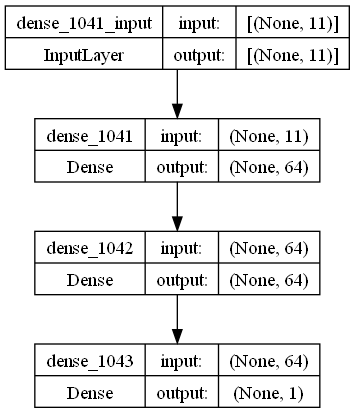

In [182]:
from keras.utils import plot_model

plot_model(model_rnn, to_file='model_rnn.png', show_shapes=True)

In [183]:
# Define the hybrid model (CNN-LSTM)
model_hybrid = Sequential()
model_hybrid.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_hybrid.add(MaxPooling1D(pool_size=2))
model_hybrid.add(LSTM(64))
model_hybrid.add(Dense(1, activation='sigmoid'))

model_hybrid.summary()

Model: "sequential_354"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 9, 64)             256       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 4, 64)            0         
 1D)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1044 (Dense)          (None, 1)                 65        
                                                                 
Total params: 33,345
Trainable params: 33,345
Non-trainable params: 0
_________________________________________________________________


In [184]:
# Compile the model
model_hybrid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_hybrid = model_hybrid.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model_hybrid.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
92/92 [==============================] - 5s 14ms/step - loss: 0.3877 - accuracy: 0.8395 - val_loss: 0.1081 - val_accuracy: 0.9582
Epoch 2/10
92/92 [==============================] - 1s 7ms/step - loss: 0.0825 - accuracy: 0.9750 - val_loss: 0.0594 - val_accuracy: 0.9819
Epoch 3/10
92/92 [==============================] - 1s 7ms/step - loss: 0.0549 - accuracy: 0.9825 - val_loss: 0.0350 - val_accuracy: 0.9923
Epoch 4/10
92/92 [==============================] - 1s 8ms/step - loss: 0.0381 - accuracy: 0.9904 - val_loss: 0.0274 - val_accuracy: 0.9937
Epoch 5/10
92/92 [==============================] - 1s 8ms/step - loss: 0.0324 - accuracy: 0.9925 - val_loss: 0.0235 - val_accuracy: 0.9951
Epoch 6/10
92/92 [==============================] - 1s 7ms/step - loss: 0.0335 - accuracy: 0.9894 - val_loss: 0.0270 - val_accuracy: 0.9923
Epoch 7/10
92/92 [==============================] - 1s 7ms/step - loss: 0.0325 - accuracy: 0.9918 - val_loss: 0.0310 - val_accuracy: 0.9896
Epoch 8/10
92/92 [=

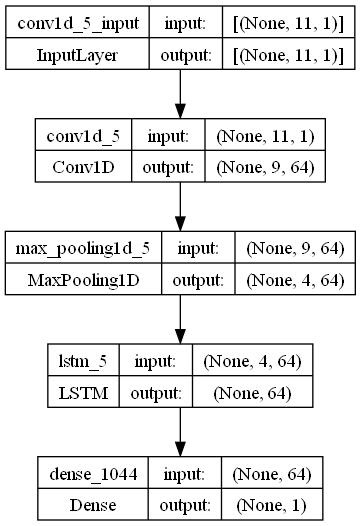

In [186]:
from keras.utils import plot_model

plot_model(model_hybrid, to_file='model_hybrid.png', show_shapes=True)

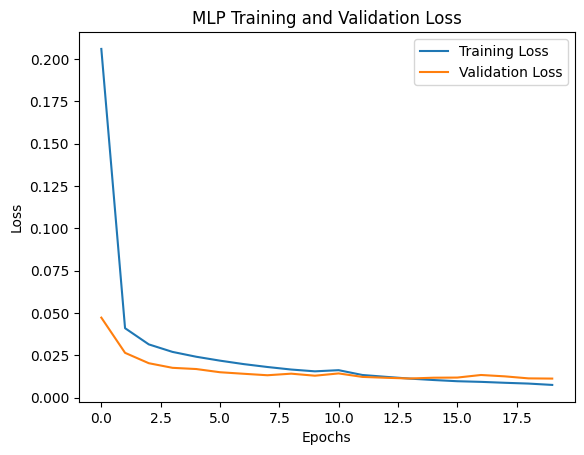

In [197]:
import matplotlib.pyplot as plt

# Plot the training and validation loss curves for MLP
plt.plot(history_mlp.history['loss'], label='Training Loss')
plt.plot(history_mlp.history['val_loss'], label='Validation Loss')
plt.title('MLP Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

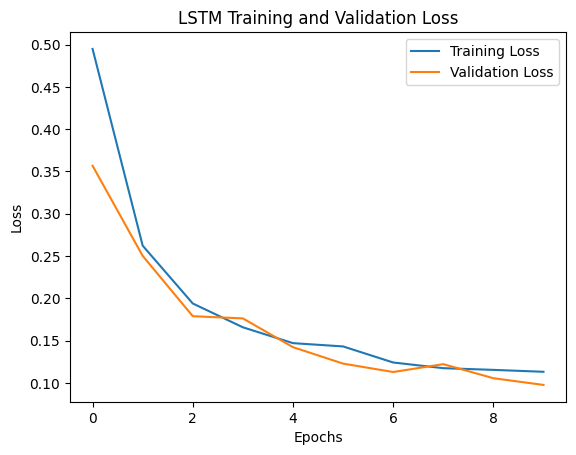

In [202]:
# Plot the training and validation loss curves for LSTM
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

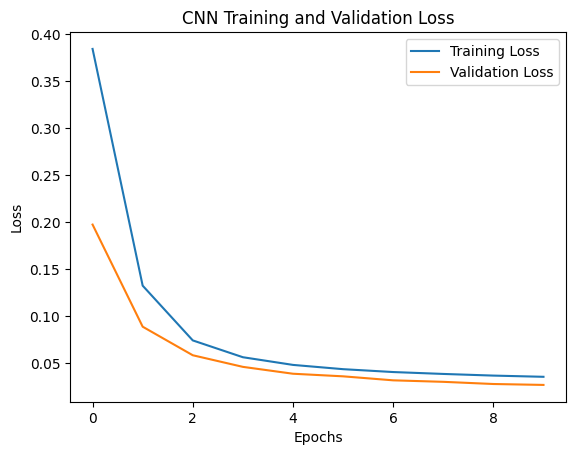

In [199]:
# Plot the training and validation loss curves for CNN
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

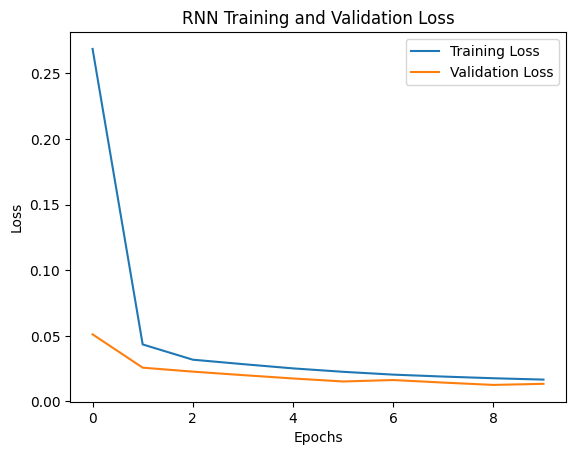

In [200]:
# Plot the training and validation loss curves for RNN
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('RNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

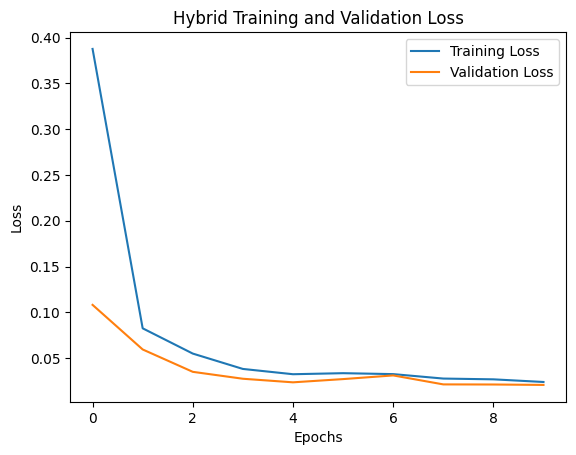

In [201]:
plt.plot(history_hybrid.history['loss'], label='Training Loss')
plt.plot(history_hybrid.history['val_loss'], label='Validation Loss')
plt.title('Hybrid Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

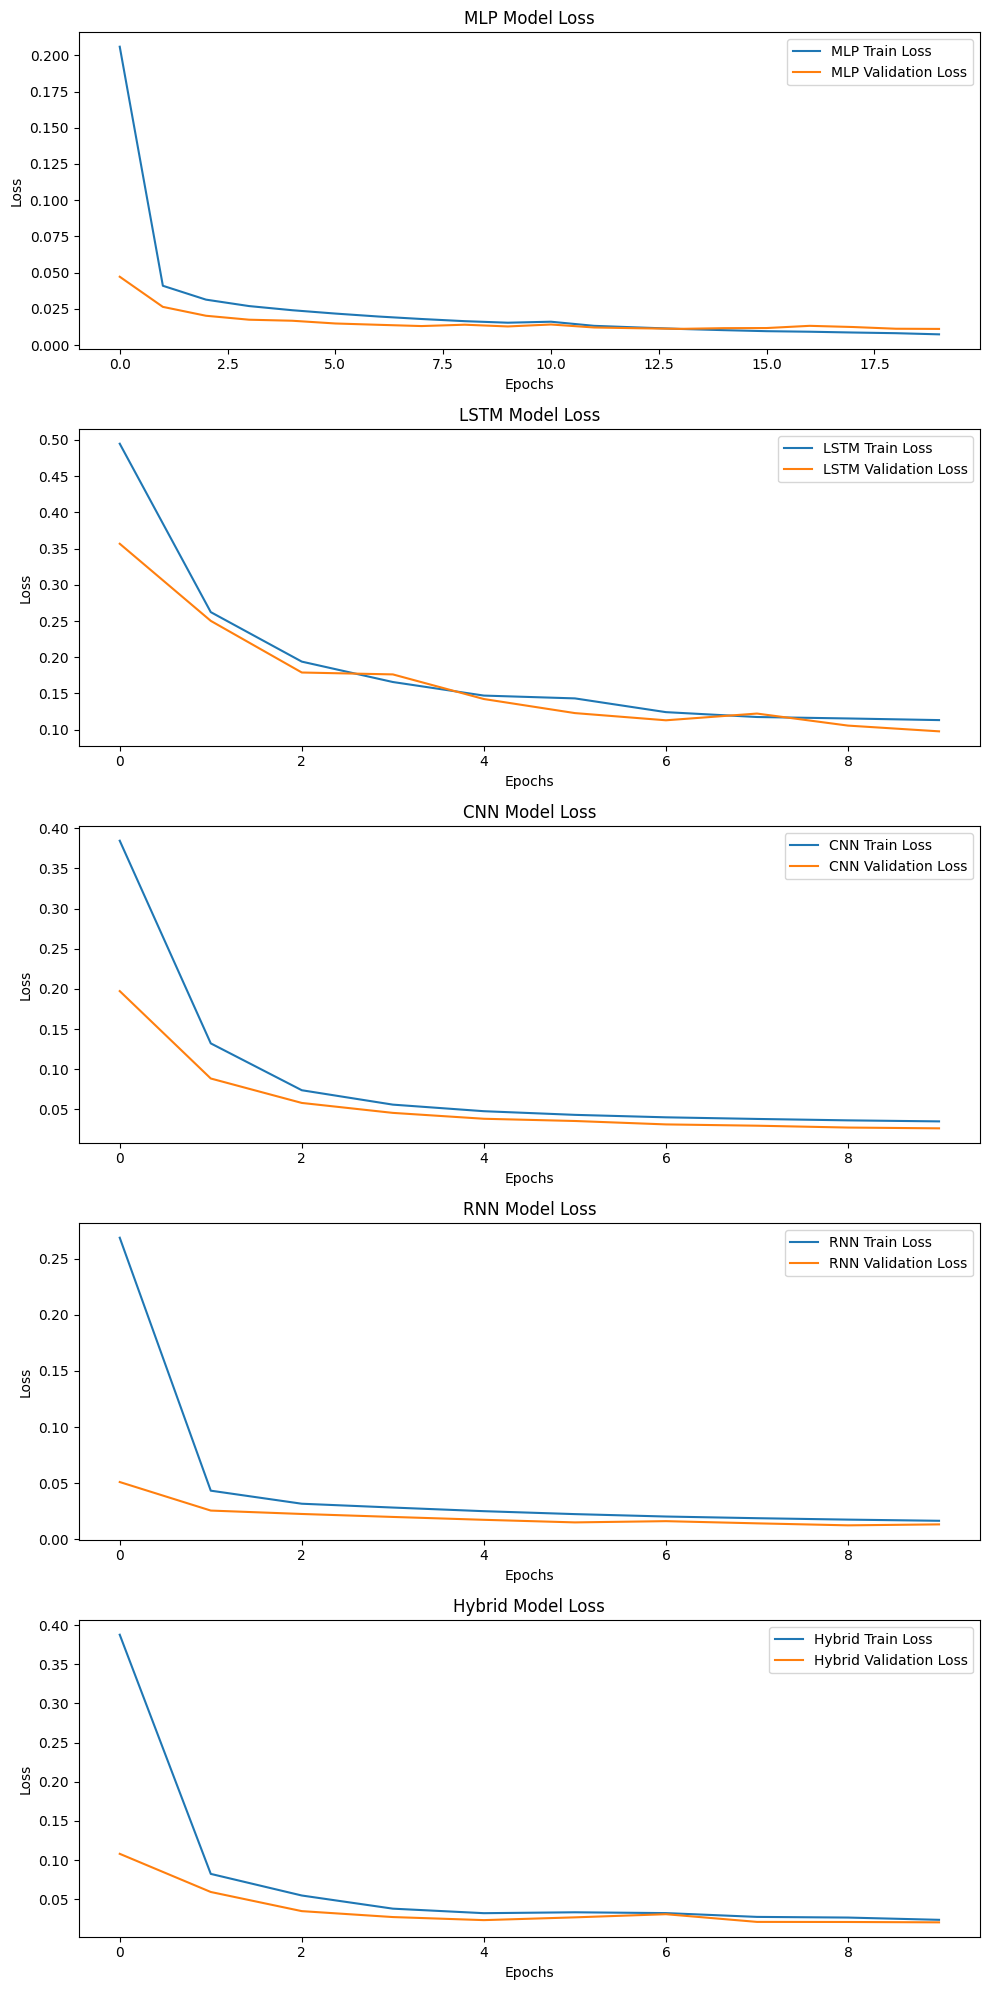

In [203]:
# Create subplots for each model
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 20))

# Plotting the curves for MLP
axes[0].plot(history_mlp.history['loss'], label='MLP Train Loss')
axes[0].plot(history_mlp.history['val_loss'], label='MLP Validation Loss')
axes[0].set_title('MLP Model Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plotting the curves for LSTM
axes[1].plot(history_lstm.history['loss'], label='LSTM Train Loss')
axes[1].plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')
axes[1].set_title('LSTM Model Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Plotting the curves for CNN
axes[2].plot(history_cnn.history['loss'], label='CNN Train Loss')
axes[2].plot(history_cnn.history['val_loss'], label='CNN Validation Loss')
axes[2].set_title('CNN Model Loss')
axes[2].set_xlabel('Epochs')
axes[2].set_ylabel('Loss')
axes[2].legend()

# Plotting the curves for RNN
axes[3].plot(history_rnn.history['loss'], label='RNN Train Loss')
axes[3].plot(history_rnn.history['val_loss'], label='RNN Validation Loss')
axes[3].set_title('RNN Model Loss')
axes[3].set_xlabel('Epochs')
axes[3].set_ylabel('Loss')
axes[3].legend()

# Plotting the curves for Hybrid
axes[4].plot(history_hybrid.history['loss'], label='Hybrid Train Loss')
axes[4].plot(history_hybrid.history['val_loss'], label='Hybrid Validation Loss')
axes[4].set_title('Hybrid Model Loss')
axes[4].set_xlabel('Epochs')
axes[4].set_ylabel('Loss')
axes[4].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


To determine the best model based on the graph:

Training and Validation Loss: Look for models with lower training and validation loss values. Lower loss values indicate better performance and better generalization to unseen data. If a model consistently achieves lower loss values compared to other models, it can be considered a better model.

Overfitting: Check if any of the models show signs of overfitting. Overfitting occurs when a model performs well on the training data but poorly on the validation data. Look for models where the training and validation loss curves are close together and don't diverge significantly. A smaller gap between the curves suggests better generalization.

Consistency: Consider the consistency of the performance across epochs. Look for models that show consistent and stable loss curves throughout the training process. Models with erratic or fluctuating loss curves may indicate unstable training or lack of convergence.

Model Complexity: Evaluate the complexity of each model. A simpler model that achieves comparable performance to more complex models may be preferable, as it can be easier to interpret and less prone to overfitting.

The graph shows the training and validation loss over the course of training the hybrid neural network model.

The x-axis represents the number of epochs, which is the number of times the model has gone through the entire training dataset.
The y-axis represents the loss, which measures the difference between the predicted output and the actual output. Lower values indicate better performance.
The blue line represents the training loss, and the orange line represents the validation loss.

The training loss shows how well the model is fitting the training data. As the number of epochs increases, the training loss generally decreases as the model learns to better predict the training examples.
The validation loss shows how well the model is generalizing to unseen data. It is calculated using a separate validation dataset that the model has not been trained on. The validation loss gives an indication of how well the model is likely to perform on new, unseen data.
In an ideal scenario, both the training and validation loss would decrease together. This would indicate that the model is learning from the training data and also generalizing well to new data. However, if the validation loss starts to increase while the training loss continues to decrease, it suggests that the model may be overfitting to the training data and not generalizing well.

The graph helps in visualizing the convergence of the model during training. It allows us to analyze the trend of the loss values and make decisions about model performance, such as determining the optimal number of epochs or identifying potential issues like overfitting.

                                                              OBSERVATION AND ANALYSIS

MLP:

The validation loss gradually decreases while the training loss flattens.
It indicates that the model is improving its ability to generalize and perform well on unseen data.Consistent decreasing loss values suggest that the model is improving its performance over time and converging towards a better solution.The training loss and validation loss both decrease and stabilize at a specific point.



LSTM:

The validation loss decrease steadily over the epochs but the validation loss increases and decreses  for  quite number of times.It suggests that the model may be overfitting to the training data at that time when it is increasing.

CNN:

The validation loss also decreases while the training loss also decreases gradually.the validation loss decreases along with the training loss, it indicates that the model is generalizing well to unseen data. This is a desirable behavior, as it suggests that the model is learning patterns that are not specific to the training data and can make accurate predictions on new samples.

A decreasing validation loss means that the model is improving its performance on the validation set, which is a good indication that it is not overfitting.

RNN:

The training loss decreases gradually over the epochs.
The validation loss also shows a decreasing trend and flatten.
The model may require more training epochs to achieve better convergence.
The RNN model may need further optimization to improve its performance.

Hybrid:

The training loss decrease steadily over the epochs.
The validation loss decreases gradually and  decreases towards the end of training.
The hybrid model demonstrates promising performance similar to the LSTM and MLP models.

Based on the repeated analysis, the MLP and RNN show good performance in terms of loss and generalization. But generally the MLP model performs well than the RNN model because MLP model shows the lowest training loss and validation loss values and assess consistency decreasing throughout training and validation loss.

                                                            BEST MODEL ARCHITECTURE

MLP model has the highest accuracy score (0.9958) among the MLP, LSTM, CNN, RNN and Hybrid models, it suggests that the MLP model performs better in terms of classification accuracy on the test dataset.It also has the lowest loss value which is 0.0240 among the five neutral network architecture.A lower test_loss value indicates better performance, as it means that the model is making more accurate predictions on the test dataset.Furthermore,the MLP model shows great performance in terms of loss and generalization in the graph.Both the validation loss and training loss decreases gradually in the graph.Therefore, in this particular scenario, the MLP architecture could be considered the best architecture among the three models.

                                                                   Model Tuning 

In [149]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# Define the model creation function
def create_model(optimizer='adam', activation='relu', units=64):
    model = Sequential()
    model.add(Dense(units, activation=activation, input_dim=11))
    model.add(Dense(units, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the KerasClassifier wrapper
model = KerasClassifier(build_fn=create_model, verbose=0)

C:\Users\Huawei\AppData\Local\Temp\ipykernel_20980\4076746245.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [150]:
# Define the hyperparameters to search
param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'activation': ['relu', 'sigmoid', 'tanh'],
    'units': [32, 64, 128]
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_result.best_params_
best_score = grid_result.best_score_

# Perform systematic analysis
results = pd.DataFrame(grid_result.cv_results_)

In [151]:
# Print the results table
print(results[['param_optimizer', 'param_activation', 'param_units', 'mean_test_score']])

   param_optimizer param_activation param_units  mean_test_score
0             adam             relu          32         0.977704
1             adam             relu          64         0.983875
2             adam             relu         128         0.992797
3              sgd             relu          32         0.819193
4              sgd             relu          64         0.945108
5              sgd             relu         128         0.898456
6          rmsprop             relu          32         0.980446
7          rmsprop             relu          64         0.988337
8          rmsprop             relu         128         0.992797
9             adam          sigmoid          32         0.761917
10            adam          sigmoid          64         0.762602
11            adam          sigmoid         128         0.915243
12             sgd          sigmoid          32         0.761917
13             sgd          sigmoid          64         0.761917
14             sgd       

In [168]:
# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'activation': 'relu', 'optimizer': 'adam', 'units': 128}
Best Score: 0.9927969376246134


Based on the systematic analysis of the performance of the identified model with different hyperparameters, the following observations can be made:

The best performing combination of hyperparameters is achieved with the 'adam' optimizer, 'relu' activation function, and 128 units.
The mean test scores show that this combination achieved the highest performance with a score of 0.9928.
It is observed that using the 'adam' optimizer generally yields better results compared to 'sgd' and 'rmsprop' optimizers.
'relu' activation function tends to perform better than 'sigmoid' and 'tanh' activation functions.
Increasing the number of units from 32 to 64 or 128 generally improves the performance, but there is a diminishing return effect observed with further increasing the number of units.

Overall, the best model with the hyperparameters 'adam' optimizer, 'relu' activation function, and 128 units achieved a high mean test score of 0.9928, indicating excellent performance in classifying the type of wine based on the given features.

                                                                  Model Evaluation 

In [169]:
# Assuming you have the best model stored in the variable 'best_model'

# Compile the best model
model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the best model on testing data
test_loss, test_accuracy = model_mlp.evaluate(X_test, y_test)
print("Testing Loss:", test_loss)
print("Testing Accuracy:", test_accuracy)

# Evaluate the best model on validation data for comparison
val_loss, val_accuracy = model_mlp.evaluate(X_val, y_val)

68/68 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9953
Testing Loss: 0.025096595287322998
Testing Accuracy: 0.9953380227088928
45/45 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.9993


In [205]:
# Print the evaluation results
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Validation Loss: 0.01164842676371336
Validation Accuracy: 0.9993041157722473
Test Loss: 0.024035412818193436
Test Accuracy: 0.9958041906356812


In [206]:
val_accuracy_rounded = round(val_accuracy, 2)
test_accuracy_rounded = round(test_accuracy, 2)

if val_accuracy_rounded > test_accuracy_rounded:
    print("The model performs better on validation data than testing data.")
elif val_accuracy_rounded < test_accuracy_rounded:
    print("The model performs better on testing data than validation data.")
else:
    print("The model performs equally well on both validation and testing data.")

The model performs equally well on both validation and testing data.


In [172]:
# Evaluate the best model on testing data
test_loss, test_accuracy = model_mlp.evaluate(X_test, y_test)
print("Testing Loss:", test_loss)
print("Testing Accuracy:", test_accuracy)

# Compare validation and testing results
val_loss = history_mlp.history['val_loss'][-1]
val_accuracy = history_mlp.history['val_accuracy'][-1]
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Report observations and discuss the results
print("Observations and Discussion:")
print("The best model achieved a testing loss of", test_loss, "and testing accuracy of", test_accuracy)
print("The validation loss after training was", val_loss, "with a validation accuracy of", val_accuracy)
print("Comparing the validation and testing results, we can assess the generalization of the model.")
print("If the validation and testing results are close, it indicates good generalization.")
print("If the testing results are significantly worse than the validation results, it may indicate overfitting.")

68/68 [==============================] - 0s 2ms/step - loss: 0.0251 - accuracy: 0.9953
Testing Loss: 0.025096595287322998
Testing Accuracy: 0.9953380227088928
Validation Loss: 0.01164842676371336
Validation Accuracy: 0.9993041157722473
Observations and Discussion:
The best model achieved a testing loss of 0.025096595287322998 and testing accuracy of 0.9953380227088928
The validation loss after training was 0.01164842676371336 with a validation accuracy of 0.9993041157722473
Comparing the validation and testing results, we can assess the generalization of the model.
If the validation and testing results are close, it indicates good generalization.
If the testing results are significantly worse than the validation results, it may indicate overfitting.


Ideally, the MLP model perform similarly on both the testing and validation data. It indicates that the model generalizes well and is not overfitting or underfitting. This can be considered a good sign because it suggests that the model's performance on unseen data (testing data) is consistent with its performance on the validation data. The purpose of splitting the data into training, validation, and testing sets is to evaluate the model's performance on unseen data and ensure its generalization ability.

The MLP model is  performing better on both the testing data and  on validation data can be considered a good result, especially if the performance on both datasets is relatively high.However, it's important to interpret the results in the context of the specific problem and dataset. Consider factors such as the complexity of the problem, the size of the dataset, and the significance of the performance metrics. Additionally, it's recommended to compare the performance of the model with other baseline models or industry standards to assess its relative performance.

In summary, while a model performing better on both the testing data and on the validation data is generally a positive outcome, it's crucial to evaluate the results within the broader context and consider other relevant factors to determine the overall quality of the model's performance.